# Data Wrangling

In this notebook, we perform data cleaning, fix missing values, and add new columns with meaning values.

## Loading modules

In [1]:
import pandas as pd
import numpy as np
#To find the file encoding type
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display configuration

#from IPython.core.display import HTML
#css = open('../style-table.css').read() + open('../style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

## Importing and loading data

### Test data
We acquired the test score data for the [California Assessment of Student Performance and Progress (CAASPP)](https://caaspp.cde.ca.gov/). The data is available between 2015 and 2018.

* [CAASPP test scores](https://caaspp.cde.ca.gov/sb2018/ResearchFileList) 

#### Test data
We first load the 2018 test data.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
missing_values = ['n/a', 'na', '-', '*']

In [5]:
df = pd.read_csv("../../Data/sb_ca2018_all_csv_v3/sb_ca2018_all.csv", na_values = missing_values, 
                 dtype={'Percentage Standard Exceeded': np.float64,
                        'Percentage Standard Met': np.float64,
                        'Percentage Standard Met and Above': np.float64,
                        'Percentage Standard Nearly Met': np.float64,
                        'Percentage Standard Not Met': np.float64,
                        'Area 1 Percentage Above Standard': np.float64,
                        'Area 1 Percentage Near Standard': np.float64,
                        'Area 1 Percentage Below Standard': np.float64,
                        'Area 2 Percentage Above Standard': np.float64,
                        'Area 2 Percentage Near Standard': np.float64,
                        'Area 2 Percentage Below Standard': np.float64,
                        'Area 3 Percentage Above Standard': np.float64,
                        'Area 3 Percentage Near Standard': np.float64,
                        'Area 3 Percentage Below Standard': np.float64,
                        'Area 4 Percentage Above Standard': np.float64,
                        'Area 4 Percentage Near Standard': np.float64,
                        'Area 4 Percentage Below Standard': np.float64})

In [6]:
df.shape

(3269730, 32)

In [7]:
df.head()

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,3,1,445017.0,434454.0,2424.0,26.13,22.09,48.22,23.49,28.29,434193.0,25.32,44.02,30.66,23.84,43.30,32.85,20.89,61.25,17.86,27.60,47.71,24.68
1,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,3,2,445018.0,436464.0,2430.9,21.07,27.82,48.89,23.56,27.55,436215.0,33.59,33.20,33.21,26.72,42.30,30.98,28.80,46.31,24.89,0.00,0.00,0.00
2,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,4,2,463838.0,455589.0,2467.7,18.46,24.45,42.92,30.81,26.27,455315.0,29.03,31.02,39.95,21.65,44.73,33.62,24.03,43.78,32.20,0.00,0.00,0.00
3,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,4,1,463838.0,453771.0,2463.7,26.31,22.36,48.67,19.25,32.08,453491.0,24.77,46.77,28.46,24.18,44.21,31.61,19.30,63.22,17.48,25.86,48.83,25.31
4,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,5,1,469247.0,459433.0,2496.3,21.80,27.63,49.43,19.99,30.58,459208.0,24.22,45.02,30.76,29.20,41.42,29.38,16.52,59.74,23.73,28.29,44.32,27.39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269730 entries, 0 to 3269729
Data columns (total 32 columns):
County Code                          int64
District Code                        int64
School Code                          int64
Filler                               float64
Test Year                            int64
Subgroup ID                          int64
Test Type                            object
Total Tested At Entity Level         float64
Total Tested with Scores             float64
Grade                                int64
Test Id                              int64
CAASPP Reported Enrollment           float64
Students Tested                      float64
Mean Scale Score                     float64
Percentage Standard Exceeded         float64
Percentage Standard Met              float64
Percentage Standard Met and Above    float64
Percentage Standard Nearly Met       float64
Percentage Standard Not Met          float64
Students with Scores                 float64
Ar

#### Entity tables
The following entity files list the County, District, and School entity names and codes for all entities as the existed in the administration year selected. This file must be merged with the test data file to join these entity names with the appropriate score data.

In [9]:
#find the file encoding type
#with open("../../Data/sb_ca2018_all_csv_v3/sb_ca2018entities.csv", 'rb') as f:
#    result = chardet.detect(f.read())  # or readline if the file is large
    
result = {'encoding': 'Windows-1252', 'confidence': 0.7299741290274674, 'language': ''}

In [10]:
entities = pd.read_csv("../../Data/sb_ca2018_all_csv_v3/sb_ca2018entities.csv", encoding=result['encoding'], na_values = missing_values)

In [11]:
entities.shape

(11333, 10)

In [12]:
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 10 columns):
County Code      11333 non-null int64
District Code    11333 non-null int64
School Code      11333 non-null int64
Filler           0 non-null float64
Test Year        11333 non-null int64
Type Id          11333 non-null int64
County Name      11333 non-null object
District Name    11274 non-null object
School Name      10251 non-null object
Zip Code         11333 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 885.5+ KB


In [13]:
entities.drop(columns='Filler', inplace=True)

The `Zip Code` is type string. For further merging cases, we change the `Zip Code` to the integer type to maintain the same type.

In [14]:
#tip: we need same data types of keywords for merging

#missing values

#convert 'Zip Code' column type: string to int64
entities['Zip Code'] = pd.to_numeric(entities['Zip Code'], errors='coerce').fillna(0).astype(np.int64)

In [15]:
entities.head()

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,35,67520,6035109,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043
1,35,67538,0,2018,6,San Benito,San Benito High,NaN,0
2,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023
3,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023
4,35,67553,0,2018,6,San Benito,Southside Elementary,NaN,0


#### Subgroup and Test ID tables
Each [`Subgroup ID`](https://caaspp.cde.ca.gov/sb2018/research_fixfileformat18) has the following meanings. We can investigate the characteristics of individual students. 

In [16]:
subgroup = pd.read_csv("../../Data/Subgroups.txt", header=None, na_values = missing_values)
subgroup.shape

(47, 4)

In [17]:
subgroup.head()

,0,1,2,3
0,1,1,"""All Students""","""All Students"""
1,3,3,"""Male""","""Gender"""
2,4,4,"""Female""","""Gender"""
3,6,6,"""Fluent English proficient and English only""","""English-Language Fluency"""
4,7,7,"""Initial fluent English proficient (IFEP)""","""English-Language Fluency"""


We clean the `Subgroup ID` table. The first and the second columns are redundant, so the first one is dropped. We name the columns. 

The category "English-Language Fluency" has the 8 student groups:
* Fluent English proficient and English only
* Initial fluent English proficient (IFEP)
* Reclassified fluent English proficient (RFEP)
* English learners (ELs) enrolled in school in the U.S. fewer than 12 months
* English learners enrolled in school in the U.S. 12 months or more
* English learner
* Ever-ELs
* English only

Those groups are related as follows:
* Total students = Fluent English proficient and English only + English learner
* Fluent English proficient and English only = Initial fluent English proficient (IFEP) + Reclassified fluent English proficient (RFEP) + English only
* English learner = English learners (ELs) enrolled in school in the U.S. fewer than 12 months + English learners enrolled in school in the U.S. 12 months or more
* Ever-ELs = Reclassified fluent English proficient (RFEP) + English learner

The definition of **Initial fluent English proficient (IFEP)** is as follows:
On the first ever taken California English Language Development Test (CELDT), if your child scored at the Early Advanced or Advanced level of language proficiency, your child is identified as "Initially Fluent English Proficient" or IFEP, meaning that your child has enough language proficiency to continue learning like native language speaking and doesn’t need additional English Language Development support.

In [18]:
#delete first column (redundant with the second column); axis = 0 (index) and axis =1 (column), inplace=True means adjusting
subgroup.drop(0, axis=1, inplace=True)
subgroup.columns = ['Subgroup ID', 'Student Groups', 'Category']
subgroup.sort_values("Category")

,Subgroup ID,Student Groups,Category
0,1,"""All Students""","""All Students"""
24,128,"""Students with disability""","""Disability Status"""
20,99,"""Students with no reported disability""","""Disability Status"""
21,111,"""Not economically disadvantaged""","""Economic Status"""
7,31,"""Economically disadvantaged""","""Economic Status"""
25,142,"""English learners enrolled in school in the U...","""English-Language Fluency"""
29,180,"""English only""","""English-Language Fluency"""
22,120,"""English learners (ELs) enrolled in school in...","""English-Language Fluency"""
30,190,"""To be determined (TBD)""","""English-Language Fluency"""
28,170,"""Ever-ELs""","""English-Language Fluency"""


In [19]:
subgroup['Category'] = subgroup['Category'].map(lambda x: x.replace('"', '').strip())
subgroup['Student Groups'] = subgroup['Student Groups'].map(lambda x: x.replace('"', '').strip())
subgroup

,Subgroup ID,Student Groups,Category
0,1,All Students,All Students
1,3,Male,Gender
2,4,Female,Gender
3,6,Fluent English proficient and English only,English-Language Fluency
4,7,Initial fluent English proficient (IFEP),English-Language Fluency
5,8,Reclassified fluent English proficient (RFEP),English-Language Fluency
6,28,Migrant education,Migrant
7,31,Economically disadvantaged,Economic Status
8,74,Black or African American,Ethnicity
9,75,American Indian or Alaska Native,Ethnicity


The `Test ID` has the following meanings. The `Test ID` is 1-4; 1 represents ELA and 2 represents mathematics, respectively. We do not consider 3 and 4 because they are CAA (California Alternative Assessments) scores. The CAA scores are taken by students in grades 3–8 and grade 11 whose individualized education program (IEP) teams have determined that the student's cognitive disabilities prevent him or her from taking the online CAASPP Smarter Balanced assessments.

For readability, we convert the **column type** of `Test Id` from `int64` to `string`.

In [20]:
#performance better (ver 1).

# tests_id = pd.read_csv("../../Data/Tests.txt", header=None, na_values = missing_values)
# tests_id.columns = ['Test Id Name', 'Test Id', 'Test Name']
# tests_id.drop(0, axis=0, inplace=True)

# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("1", "English")
# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("2", "Mathematics")
# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("3", "CAA-English")                                                        
# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("4", "CAA-Mathematics") 

# #type conversion : string to int64
# tests_id['Test Id'] = pd.to_numeric(tests_id['Test Id'], errors='coerce').fillna(0).astype(np.int64)
# tests_id.drop(columns='Test Name', inplace=True)

# tests_id

# df = pd.merge(tests_id, df, how='inner', on=['Test Id'])
# df.drop(columns='Test Id', inplace=True)
# df.rename(columns={'Test Id Name': 'Test Id'}, inplace=True)

In [21]:
#performance better (ver 2).
#convert 'Test Id' column type: int64 to string

df['Test Id'] = df['Test Id'].replace(1, "English")
df['Test Id'] = df['Test Id'].replace(2, "Mathematics")
df['Test Id'] = df['Test Id'].replace(3, "CAA-English")
df['Test Id'] = df['Test Id'].replace(4, "CAA-Mathematics")

I decided to use only the next columns: ‘Country Code’, ‘District Code’, ‘School Code’, ‘Test Year’, ‘Subgroup ID’, ‘Grade’, ‘Test Id’, ‘Students with Scores’, and achievement levels. The [minimum and maximum test scale score ranges](https://caaspp.cde.ca.gov/sb2016/ScaleScoreRanges) are provided, and the ‘Mean Scale Score’ is used to determine four achievement levels: ‘Percentage Standard Exceeded’ ‘Percentage Standard Met’, ‘Percentage Standard Nearly Met’, ‘Percentage Standard Not Met’. Many studies showed that discretization can lead to improved predictive accuracy and is more understandable. The test score data also has [area descriptors](https://caaspp.cde.ca.gov/sb2018/UnderstandingCAASPPReports). There are 4 areas of reading, writing, listening, and research/inquiry for ELA whereas 3 areas of concepts and procedures, problem solving/modeling and data analysis, and communicating reasoning for mathematics. For each area, the achievement levels are divided into ‘Above Standard’, ‘Near Standard’, and ‘Below Standard’ depending on the scale scores compared to the ‘Standard Met’ achievement level.

In [22]:
#Percentage Standard Met and Above = Percentage Standard Exceeded + Percentage Standard Met
df.drop(columns=['Filler', 'Total Tested At Entity Level', 'Total Tested with Scores', 'CAASPP Reported Enrollment', 'Students Tested', 'Mean Scale Score', 'Percentage Standard Met and Above'], inplace=True)

### House prices
* [Zillow research data](https://www.zillow.com/research/data/): House prices based on zipcodes

The Zillow Home Value Index (ZHVI) data was imported and loaded. The ZHVI is a seasonally adjusted measure of the median estimated home value across a given region and housing type. The data was collected from April 1996 to November 2018 on monthly basis. 

The column name `RegionName` denotes zipcode so it is renamed as `Zip Code`. The `Zip Code` is set as the index.

In [23]:
#with open("../../Data/Zip_Zhvi_AllHomes.csv", 'rb') as f:
#    result = chardet.detect(f.read())  # or readline if the file is large

result= {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

**Loading ver 1.**
Data manipulation using DatetimeIndex objects.

In [24]:
#df_house_price['RegionName'].dtypes --> dtype('int64')
#df_house_price2 = pd.read_csv("../../Data/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], index_col = 'RegionName', na_values = missing_values)

#tip: column names has to be changed before setting an index; if setting index while reading csv file, error!
df_house_price2 = pd.read_csv("../../Data/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], na_values = missing_values)

df_house_price2.rename(columns={'RegionName': 'Zip Code'}, inplace=True)
df_house_price2.set_index('Zip Code', inplace=True)
df_house_price2.head()

,RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
Zip Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,61639,New York,NY,New York-Newark-Jersey City,New York County,1,171600.0,171600.0,171400.0,171200.0,171000.0,171100.0,171300.0,171900.0,173000.0,174500.0,176100.0,177500.0,179000.0,180300.0,181500.0,182500.0,183500.0,184700.0,186100.0,187700.0,189900.0,192600.0,195400.0,198300.0,201500.0,204700.0,208100.0,211600.0,215200.0,218900.0,222800.0,226800.0,231200.0,235900.0,240700.0,245400.0,250500.0,255800.0,261200.0,267100.0,273400.0,280400.0,287900.0,296100.0,304900.0,314300.0,323500.0,332200.0,340600.0,348300.0,355200.0,361400.0,367200.0,372900.0,378500.0,384200.0,390100.0,395900.0,401600.0,406900.0,411600.0,415200.0,417700.0,419300.0,420300.0,420900.0,421200.0,421200.0,420500.0,419700.0,418900.0,417900.0,416400.0,414700.0,413000.0,411700.0,411000.0,411400.0,412800.0,415400.0,419000.0,422800.0,426900.0,432400.0,440700.0,453100.0,470400.0,491100.0,511600.0,528400.0,540300.0,547700.0,551700.0,554200.0,556400.0,558700.0,561300.0,564100.0,567500.0,572500.0,579600.0,589000.0,599600.0,610200.0,621600.0,634500.0,648800.0,663800.0,678200.0,690900.0,701600.0,710300.0,717600.0,724100.0,730700.0,737400.0,744200.0,751400.0,758400.0,764700.0,769900.0,773500.0,774900.0,772600.0,767200.0,761800.0,760300.0,763600.0,770400.0,777900.0,784900.0,790900.0,795600.0,799300.0,803200.0,809600.0,819500.0,831600.0,843400.0,852100.0,856200.0,857200.0,856500.0,853300.0,846200.0,836300.0,826100.0,820400.0,820800.0,822800.0,822100.0,818500.0,812500.0,807200.0,804600.0,803100.0,801000.0,799900.

In [25]:
df_house_price2.shape

(15531, 278)

In [26]:
df_house_price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15531 entries, 10025 to 89155
Columns: 278 entries, RegionID to 2018-11
dtypes: float64(225), int64(49), object(4)
memory usage: 33.1+ MB


In [27]:
df_house_price2.drop(columns=['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], inplace=True)
df_house_price2.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
Zip Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,171600.0,171600.0,171400.0,171200.0,171000.0,171100.0,171300.0,171900.0,173000.0,174500.0,176100.0,177500.0,179000.0,180300.0,181500.0,182500.0,183500.0,184700.0,186100.0,187700.0,189900.0,192600.0,195400.0,198300.0,201500.0,204700.0,208100.0,211600.0,215200.0,218900.0,222800.0,226800.0,231200.0,235900.0,240700.0,245400.0,250500.0,255800.0,261200.0,267100.0,273400.0,280400.0,287900.0,296100.0,304900.0,314300.0,323500.0,332200.0,340600.0,348300.0,355200.0,361400.0,367200.0,372900.0,378500.0,384200.0,390100.0,395900.0,401600.0,406900.0,411600.0,415200.0,417700.0,419300.0,420300.0,420900.0,421200.0,421200.0,420500.0,419700.0,418900.0,417900.0,416400.0,414700.0,413000.0,411700.0,411000.0,411400.0,412800.0,415400.0,419000.0,422800.0,426900.0,432400.0,440700.0,453100.0,470400.0,491100.0,511600.0,528400.0,540300.0,547700.0,551700.0,554200.0,556400.0,558700.0,561300.0,564100.0,567500.0,572500.0,579600.0,589000.0,599600.0,610200.0,621600.0,634500.0,648800.0,663800.0,678200.0,690900.0,701600.0,710300.0,717600.0,724100.0,730700.0,737400.0,744200.0,751400.0,758400.0,764700.0,769900.0,773500.0,774900.0,772600.0,767200.0,761800.0,760300.0,763600.0,770400.0,777900.0,784900.0,790900.0,795600.0,799300.0,803200.0,809600.0,819500.0,831600.0,843400.0,852100.0,856200.0,857200.0,856500.0,853300.0,846200.0,836300.0,826100.0,820400.0,820800.0,822800.0,822100.0,818500.0,812500.0,807200.0,804600.0,803100.0,801000.0,799900.0,795300.0,783100.0,767000.0,753400.0,744300.0,739100.0,740300.0,742000.0,739600.0,737800.0,745900.0,760600.0,776900

We make columns as **DatetimeIndex objects**. I found this is more convenient and safe for dealing with time related data.

In [28]:
#tip: when dealing with time data, it is much better to use time related libraries!
#pandas.DatetimeIndex
df_house_price2.columns = pd.to_datetime(df_house_price2.columns)
df_house_price2.head()

,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00,1998-07-01 00:00:00,1998-08-01 00:00:00,1998-09-01 00:00:00,1998-10-01 00:00:00,1998-11-01 00:00:00,1998-12-01 00:00:00,1999-01-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,1999-06-01 00:00:00,1999-07-01 00:00:00,1999-08-01 00:00:00,1999-09-01 00:00:00,1999-10-01 00:00:00,1999-11-01 00:00:00,1999-12-01 00:00:00,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,2000-11-01 00:00:00,2000-12-01 00:00:00,2001-01-01 00:00:00,2001-02-01 00:00:00,2001-03-01 00:00:00,2001-04-01 00:00:00,2001-05-01 00:00:00,2001-06-01 00:00:00,2001-07-01 00:00:00,2001-08-01 00:00:00,2001-09-01 00:00:00,2001-10-01 00:00:00,2001-11-01 00:00:00,2001-12-01 00:00:00,2002-01-01 00:00:00,2002-02-01 00:00:00,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,2003-01-01 00:00:00,2003-02-01 00:00:00,2003-03-01 00:00:00,2003-04-01 00:00:00,2003-05-01 00:00:00,2003-06-01 00:00:00,2003-07-01 00:00:00,2003-08-01 00:00:00,2003-09-01 00:00:00,2003-10-01 00:00:00,2003-11-01 00:00:00,2003-12-01 00:00:00,2004-01-01 00:00:00,2004-02-01 00:00:00,2004-03-01 00:00:00,2004-04-01 00:00:00,2004-05-01 00:00:00,2004-06-01 00:00:00,2004-07-01 00:00:00,2004-08-01 00:00:00,2004-09-01 00:00:00,2004-10-01 00:00:00,2004-11-01 00:00:00,2004-12-01 00:00:00,2005-01-01 00:00:00,2005-02-01 00:00:00,2005-03-01 00:00:00,2005-04-01 00:00:00,2005-05-01 00:00:00,2005-06-01 00:00:00,2005-07-01 00:00:00,2005-08-01 00:00:00,2005-09-01 00:00:00,2005-10-01 00:00:00,2005-11-01 00:00:00,2005-12-01 00:00:00,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,2006-09-01 00:00:00,2006-10-01 00:00:00,2006-11-01 00:00:00,2006-12-01 00:00:00,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,2007-11-01 00:00:00,2007-12-01 00:00:00,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,2008-10-01 00:00:00,2008-11-01 00:00:00,2008-12-01 00:00:00,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,2009-08-01 00:00:00,2009-09-01 00:00:00,2009-10-01 00:00:00,2009-11-01 00:00:00,2009-12-01 00:00:00,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00

I cleaned up the data by dropping house prices that are less than 2014 or greater than 2018.
To analyze the school performance on a yearly basis, the monthly prices were grouped by each year into a median value.

In [29]:
#clean data - remain data from years of 2014 to 2018
dropColumns = [ x for x in df_house_price2.columns
                if (x.year < 2014 or x.year > 2018) ]

df_house_price2.drop(columns=dropColumns, inplace=True)

In [30]:
df_house_price2.columns

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
      

In [31]:
df_house_price_grouped2 = df_house_price2.groupby(pd.Grouper(freq='Y', axis=1), axis=1).median()
df_house_price_grouped2.head()

,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00
Zip Code,,,,,
10025,936550.0,1001400.0,1116900.0,1093950.0,1110100.0
60657,311450.0,316700.0,336300.0,342600.0,350400.0
10023,1419100.0,1475900.0,1591100.0,1610050.0,1489900.0
77494,289450.0,312900.0,327350.0,320800.0,335800.0
60614,372250.0,381200.0,408650.0,419650.0,430400.0


In [32]:
#clean data
#convert columns from DatetimeIndex to int64 for compatibility

df_house_price_grouped2.columns = [x.year for x in df_house_price_grouped2.columns]

In [33]:
df_house_price_stacked2 = df_house_price_grouped2.stack().to_frame()
df_house_price_stacked2.columns = ['House_median']
df_house_price_stacked2.index.names = ['Zip Code', 'Test Year']
df_house_price_stacked2.head(10)

House_median
Zip Code Test Year              
10025    2014           936550.0
         2015          1001400.0
         2016          1116900.0
         2017          1093950.0
         2018          1110100.0
60657    2014           311450.0
         2015           316700.0
         2016           336300.0
         2017           342600.0
         2018           350400.0

**Loading ver 2.**
Data manipulation using user-defined functions.

In [34]:
#RegionName = zipcode
df_house_price = pd.read_csv("../../Data/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], na_values = missing_values)
df_house_price.rename(columns={'RegionName': 'Zip Code'}, inplace=True)
df_house_price.set_index('Zip Code', inplace=True)

In [35]:
def getYearPart(year_month):
    res = year_month.split('-')
    #if there is no '-', just return its original value
    return res[0]
def getYearPartInt(year_month):
    res = getYearPart(year_month)
    if res.isdigit():
        return int(res)
    return res

In [36]:
#consider years of 2014 to 2018 (5 years)

dropColumns = [ x for x in df_house_price.columns
                if (not getYearPart(x).isdigit()) or (int(getYearPart(x)) < 2014 or int(getYearPart(x)) > 2018) ]
df_house_price.drop(columns=dropColumns, inplace=True)

In [37]:
df_house_price_grouped = df_house_price.groupby(getYearPartInt, axis=1).median()
df_house_price_grouped.head()

,2014,2015,2016,2017,2018
Zip Code,,,,,
10025,936550.0,1001400.0,1116900.0,1093950.0,1110100.0
60657,311450.0,316700.0,336300.0,342600.0,350400.0
10023,1419100.0,1475900.0,1591100.0,1610050.0,1489900.0
77494,289450.0,312900.0,327350.0,320800.0,335800.0
60614,372250.0,381200.0,408650.0,419650.0,430400.0


In [38]:
df_house_price_stacked = df_house_price_grouped.stack().to_frame()
df_house_price_stacked.columns = ['House_median']
df_house_price_stacked.index.names = ['Zip Code', 'Test Year']
df_house_price_stacked.head(10)

House_median
Zip Code Test Year              
10025    2014           936550.0
         2015          1001400.0
         2016          1116900.0
         2017          1093950.0
         2018          1110100.0
60657    2014           311450.0
         2015           316700.0
         2016           336300.0
         2017           342600.0
         2018           350400.0

In [39]:
print (df_house_price_stacked.index.get_level_values(0).dtype)
print (df_house_price_stacked.index.get_level_values(1).dtype)

int64
int64


In [40]:
df_house_price_stacked.loc[(60657, 2018)]

House_median    350400.0
Name: (60657, 2018), dtype: float64

### Additional datasets:  Teachers demographics
Additional datasets are obtained in the following sites:
* [Civil Rights Data Collection](https://ocrdata.ed.gov/): Teacher demographics

* [GreatSchools API](https://www.greatschools.org/api/docs/technical-overview/): School profile, school reviews, school censuc data, nearby schools

## Joining multiple datasets and cleaning data
There are multiple dataset and we need to merge efficiently to obtain useful and clean data. 

**1. Select all grades (`Grade` == 13) and "Smart Balanced (basic official)" test type (`Test Type` == B).**

[The `Grade 13` denotes all grades](https://caaspp.cde.ca.gov/sb2018/research_fixfileformat18), so we decided to use data only 13 for minimum sample size. I believe the aggregated data at each school level is enough for representing the characteristics of public schools in California. 

All the test scores are from the *Smarter Balanced English Language Arts/Literacy and Mathematics* (`Test Type` = 'B')

In [41]:
# allGradesDf = df.loc[(df['Grade'] == 13) & (df['Test Type'] == "B"), :]
# allGradesDf.head()
df = df.loc[(df['Grade'] == 13) & (df['Test Type'] == "B"), :]
# allGradesDf.head()

We dropped the columns `Test Type` and `Grade`. Those columns do not convey any important information anymore.

In [42]:
dropColumns_entity = ['Test Type', 'Grade']
df.drop(columns=dropColumns_entity, inplace=True)

**2. Merge the entity table.**

We append the specific names to the test score DataFrame by merging two tables (Test data + entities).

In [43]:
allGradesDf_entity = pd.merge(entities, df, how='inner', on=['School Code', 'District Code', 'County Code', 'Test Year'])
allGradesDf_entity.head()

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,35,67520,6035109,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043,1,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,67520,6035109,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043,1,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,67520,6035109,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043,3,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,67520,6035109,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043,3,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35,67520,6035109,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043,4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3. Merge the house price data.**

Now, we merge the house prices and test score data.

In [44]:
allGradesDf_entity_house = pd.merge(allGradesDf_entity, df_house_price_stacked2, how='inner', 
                  left_on=['Zip Code', 'Test Year'], right_index=True)

allGradesDf_entity_house.head()

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
112,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,1,Mathematics,0.0,0.00,3.77,96.23,53.0,0.0,5.66,94.34,0.0,15.09,84.91,0.0,30.19,69.81,0.00,0.00,0.00,508600.0
113,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,1,English,0.0,5.66,24.53,69.81,53.0,0.0,32.08,67.92,0.0,22.64,77.36,0.0,52.83,47.17,3.77,32.08,64.15,508600.0
114,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,3,Mathematics,0.0,0.00,5.26,94.74,38.0,0.0,7.89,92.11,0.0,18.42,81.58,0.0,31.58,68.42,0.00,0.00,0.00,508600.0
115,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,3,English,0.0,7.89,23.68,68.42,38.0,0.0,34.21,65.79,0.0,23.68,76.32,0.0,57.89,42.11,5.26,31.58,63.16,508600.0
116,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,4,Mathematics,0.0,0.00,0.00,100.00,15.0,0.0,0.00,100.00,0.0,6.67,93.33,0.0,26.67,73.33,0.00,0.00,0.00,508600.0


**4. merge `Subgroup ID` table.**

In [45]:
allGradesDf_entity_house = pd.merge(subgroup, allGradesDf_entity_house, on=['Subgroup ID'])
allGradesDf_entity_house.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,Mathematics,0.00,0.00,3.77,96.23,53.0,0.00,5.66,94.34,0.00,15.09,84.91,0.00,30.19,69.81,0.00,0.00,0.00,508600.0
1,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,English,0.00,5.66,24.53,69.81,53.0,0.00,32.08,67.92,0.00,22.64,77.36,0.00,52.83,47.17,3.77,32.08,64.15,508600.0
2,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,Mathematics,10.49,24.29,24.89,40.33,667.0,22.07,31.23,46.70,13.98,49.02,36.99,16.64,54.87,28.49,0.00,0.00,0.00,508600.0
3,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,English,25.22,32.69,22.69,19.40,670.0,33.28,47.08,19.64,28.98,45.65,25.38,23.54,59.22,17.24,34.78,48.43,16.79,508600.0
4,1,All Students,All Students,35,67553,6035133,2018,7,San Benito,Southside Elementary,Southside Elementary,95023,Mathematics,24.82,22.63,33.58,18.98,137.0,30.66,35.77,33.58,25.55,54.01,20.44,29.20,48.91,21.90,0.00,0.00,0.00,508600.0


## Detecting (and imputing) missing values

In [46]:
allGradesDf_entity_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692517 entries, 0 to 692516
Data columns (total 31 columns):
Subgroup ID                         692517 non-null int64
Student Groups                      692517 non-null object
Category                            692517 non-null object
County Code                         692517 non-null int64
District Code                       692517 non-null int64
School Code                         692517 non-null int64
Test Year                           692517 non-null int64
Type Id                             692517 non-null int64
County Name                         692517 non-null object
District Name                       692517 non-null object
School Name                         692517 non-null object
Zip Code                            692517 non-null int64
Test Id                             692517 non-null object
Percentage Standard Exceeded        429639 non-null float64
Percentage Standard Met             429639 non-null float64
Percentag

In [47]:
allGradesDf_entity_house.isnull().sum()

Subgroup ID                              0
Student Groups                           0
Category                                 0
County Code                              0
District Code                            0
School Code                              0
Test Year                                0
Type Id                                  0
County Name                              0
District Name                            0
School Name                              0
Zip Code                                 0
Test Id                                  0
Percentage Standard Exceeded        262878
Percentage Standard Met             262878
Percentage Standard Nearly Met      262878
Percentage Standard Not Met         262878
Students with Scores                262878
Area 1 Percentage Above Standard    262878
Area 1 Percentage Near Standard     262878
Area 1 Percentage Below Standard    262878
Area 2 Percentage Above Standard    262878
Area 2 Percentage Near Standard     262878
Area 2 Perc

In [48]:
allGradesDf_entity_house.isnull().values.any()

True

In [49]:
allGradesDf_entity_house.isnull().sum().sum()

4468926

In [50]:
null_data = allGradesDf_entity_house[allGradesDf_entity_house.isnull().any(axis=1)]
null_data.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
6,1,All Students,All Students,35,10355,132308,2018,7,San Benito,San Benito County Office Of Education,Pinnacles Community,95023,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508600.0
7,1,All Students,All Students,35,10355,132308,2018,7,San Benito,San Benito County Office Of Education,Pinnacles Community,95023,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508600.0
8,1,All Students,All Students,35,10355,3530037,2018,7,San Benito,San Benito County Office Of Education,San Benito County Opportunity,95023,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508600.0
9,1,All Students,All Students,35,10355,3530037,2018,7,San Benito,San Benito County Office Of Education,San Benito County Opportunity,95023,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508600.0
10,1,All Students,All Students,35,10355,3530045,2018,7,San Benito,San Benito County Office Of Education,San Benito County Juvenile Hall Court,95023,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508600.0


## Data Export (Final Data)

**We finally obtain the clean data.**

In [51]:
#Drop missing observations
final_data = allGradesDf_entity_house.dropna()
final_data

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,Mathematics,0.00,0.00,3.77,96.23,53.0,0.00,5.66,94.34,0.00,15.09,84.91,0.00,30.19,69.81,0.00,0.00,0.00,508600.0
1,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,English,0.00,5.66,24.53,69.81,53.0,0.00,32.08,67.92,0.00,22.64,77.36,0.00,52.83,47.17,3.77,32.08,64.15,508600.0
2,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,Mathematics,10.49,24.29,24.89,40.33,667.0,22.07,31.23,46.70,13.98,49.02,36.99,16.64,54.87,28.49,0.00,0.00,0.00,508600.0
3,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,English,25.22,32.69,22.69,19.40,670.0,33.28,47.08,19.64,28.98,45.65,25.38,23.54,59.22,17.24,34.78,48.43,16.79,508600.0
4,1,All Students,All Students,35,67553,6035133,2018,7,San Benito,Southside Elementary,Southside Elementary,95023,Mathematics,24.82,22.63,33.58,18.98,137.0,30.66,35.77,33.58,25.55,54.01,20.44,29.20,48.91,21.90,0.00,0.00,0.00,508600.0
5,1,All Students,All Students,35,67553,6035133,2018,7,San Benito,Southside Elementary,Southside Elementary,95023,English,29.29,40.71,17.14,12.86,140.0,34.29,52.14,13.57,40.71,47.14,12.14,22.14,71.43,6.43,39.29,47.86,12.86,508600.0
12,1,All Students,All Students,35,67462,6035018,2018,7,San Benito,Cienega Union Elementary,Cienega Elementary,95023,English,12.50,16.67,29.17,41.67,24.0,8.33,45.83,45.83,16.67,41.67,41.67,4.17,79.17,16.67,20.83,33.33,45.83,508600.0
13,1,All Students,All Students,35,67462,6035018,2018,7,San Benito,Cienega Union Elementary,Cienega Elementary,95023,Mathematics,12.50,20.83,25.00,41.67,24.0,12.50,41.67,45.83,20.83,33.33,45.83,16.67,29.17,54.17,0.00,0.00,0.00,508600.0
14,1,All Students,All Students,35,67470,115428,2018,7,San Benito,Hollister,Hollister Dual Language Academy,95023,Mathematics,19.89,27.96,32.80,19.35,372.0,30.65,42.20,27.15,23.12,52.42,24.46,22.31,54.30,23.39,0.00,0.00,0.00,508600.0
15,1,All Students,All Students,35,67470,115428,2018,7,San Benito,Hollister,Hollister Dual Language Academy,95023,English,25.68,36.34,20.49,17.49,366.0,28.69,46.99,24.32,35.25,47.81,16.94,20.77,66.39,12.84,37.43,49.73,12.84,508600.0


In [52]:
# Drop school data containing "Program" that are not official schools
# Example: "Irvine Unified District Level Program" or "Alternative Education-San Joaquin High"

excludeSchoolNames = ["Program", "Alternative"]

final_data = final_data[~final_data["School Name"].str.contains('|'.join(excludeSchoolNames), case=False, na=False)]
final_data

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,Mathematics,0.00,0.00,3.77,96.23,53.0,0.00,5.66,94.34,0.00,15.09,84.91,0.00,30.19,69.81,0.00,0.00,0.00,508600.0
1,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,English,0.00,5.66,24.53,69.81,53.0,0.00,32.08,67.92,0.00,22.64,77.36,0.00,52.83,47.17,3.77,32.08,64.15,508600.0
2,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,Mathematics,10.49,24.29,24.89,40.33,667.0,22.07,31.23,46.70,13.98,49.02,36.99,16.64,54.87,28.49,0.00,0.00,0.00,508600.0
3,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,English,25.22,32.69,22.69,19.40,670.0,33.28,47.08,19.64,28.98,45.65,25.38,23.54,59.22,17.24,34.78,48.43,16.79,508600.0
4,1,All Students,All Students,35,67553,6035133,2018,7,San Benito,Southside Elementary,Southside Elementary,95023,Mathematics,24.82,22.63,33.58,18.98,137.0,30.66,35.77,33.58,25.55,54.01,20.44,29.20,48.91,21.90,0.00,0.00,0.00,508600.0
5,1,All Students,All Students,35,67553,6035133,2018,7,San Benito,Southside Elementary,Southside Elementary,95023,English,29.29,40.71,17.14,12.86,140.0,34.29,52.14,13.57,40.71,47.14,12.14,22.14,71.43,6.43,39.29,47.86,12.86,508600.0
12,1,All Students,All Students,35,67462,6035018,2018,7,San Benito,Cienega Union Elementary,Cienega Elementary,95023,English,12.50,16.67,29.17,41.67,24.0,8.33,45.83,45.83,16.67,41.67,41.67,4.17,79.17,16.67,20.83,33.33,45.83,508600.0
13,1,All Students,All Students,35,67462,6035018,2018,7,San Benito,Cienega Union Elementary,Cienega Elementary,95023,Mathematics,12.50,20.83,25.00,41.67,24.0,12.50,41.67,45.83,20.83,33.33,45.83,16.67,29.17,54.17,0.00,0.00,0.00,508600.0
14,1,All Students,All Students,35,67470,115428,2018,7,San Benito,Hollister,Hollister Dual Language Academy,95023,Mathematics,19.89,27.96,32.80,19.35,372.0,30.65,42.20,27.15,23.12,52.42,24.46,22.31,54.30,23.39,0.00,0.00,0.00,508600.0
15,1,All Students,All Students,35,67470,115428,2018,7,San Benito,Hollister,Hollister Dual Language Academy,95023,English,25.68,36.34,20.49,17.49,366.0,28.69,46.99,24.32,35.25,47.81,16.94,20.77,66.39,12.84,37.43,49.73,12.84,508600.0


In [53]:
final_data.to_csv("final_data.csv", sep='\t', encoding='utf-8')

## Data for analysis

In [54]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427079 entries, 0 to 692512
Data columns (total 31 columns):
Subgroup ID                         427079 non-null int64
Student Groups                      427079 non-null object
Category                            427079 non-null object
County Code                         427079 non-null int64
District Code                       427079 non-null int64
School Code                         427079 non-null int64
Test Year                           427079 non-null int64
Type Id                             427079 non-null int64
County Name                         427079 non-null object
District Name                       427079 non-null object
School Name                         427079 non-null object
Zip Code                            427079 non-null int64
Test Id                             427079 non-null object
Percentage Standard Exceeded        427079 non-null float64
Percentage Standard Met             427079 non-null float64
Percentag

* The score data at a county or a district level is not available. Thus, we select the school data (`Type Id` == 7) and groupby the county or the district level.

    * **`Type Id` : Type of scores**

        * Type Id
        (‘04’ = State,
        ‘05’ = County,
        ‘06’ = District,
        ‘07’ = School,
        ‘09’ = Direct Funded Charter School,
        ‘10’ = Locally Funded Charter School)

In [55]:
final_data.groupby("Type Id").count()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
Type Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381,379381
9,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600
10,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098


In [56]:
final_data = final_data.loc[(final_data["Type Id"] == 7)]
final_data

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,Mathematics,0.00,0.00,3.77,96.23,53.0,0.00,5.66,94.34,0.00,15.09,84.91,0.00,30.19,69.81,0.00,0.00,0.00,508600.0
1,1,All Students,All Students,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023,English,0.00,5.66,24.53,69.81,53.0,0.00,32.08,67.92,0.00,22.64,77.36,0.00,52.83,47.17,3.77,32.08,64.15,508600.0
2,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,Mathematics,10.49,24.29,24.89,40.33,667.0,22.07,31.23,46.70,13.98,49.02,36.99,16.64,54.87,28.49,0.00,0.00,0.00,508600.0
3,1,All Students,All Students,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023,English,25.22,32.69,22.69,19.40,670.0,33.28,47.08,19.64,28.98,45.65,25.38,23.54,59.22,17.24,34.78,48.43,16.79,508600.0
4,1,All Students,All Students,35,67553,6035133,2018,7,San Benito,Southside Elementary,Southside Elementary,95023,Mathematics,24.82,22.63,33.58,18.98,137.0,30.66,35.77,33.58,25.55,54.01,20.44,29.20,48.91,21.90,0.00,0.00,0.00,508600.0
5,1,All Students,All Students,35,67553,6035133,2018,7,San Benito,Southside Elementary,Southside Elementary,95023,English,29.29,40.71,17.14,12.86,140.0,34.29,52.14,13.57,40.71,47.14,12.14,22.14,71.43,6.43,39.29,47.86,12.86,508600.0
12,1,All Students,All Students,35,67462,6035018,2018,7,San Benito,Cienega Union Elementary,Cienega Elementary,95023,English,12.50,16.67,29.17,41.67,24.0,8.33,45.83,45.83,16.67,41.67,41.67,4.17,79.17,16.67,20.83,33.33,45.83,508600.0
13,1,All Students,All Students,35,67462,6035018,2018,7,San Benito,Cienega Union Elementary,Cienega Elementary,95023,Mathematics,12.50,20.83,25.00,41.67,24.0,12.50,41.67,45.83,20.83,33.33,45.83,16.67,29.17,54.17,0.00,0.00,0.00,508600.0
14,1,All Students,All Students,35,67470,115428,2018,7,San Benito,Hollister,Hollister Dual Language Academy,95023,Mathematics,19.89,27.96,32.80,19.35,372.0,30.65,42.20,27.15,23.12,52.42,24.46,22.31,54.30,23.39,0.00,0.00,0.00,508600.0
15,1,All Students,All Students,35,67470,115428,2018,7,San Benito,Hollister,Hollister Dual Language Academy,95023,English,25.68,36.34,20.49,17.49,366.0,28.69,46.99,24.32,35.25,47.81,16.94,20.77,66.39,12.84,37.43,49.73,12.84,508600.0


In [57]:
final_data_county = final_data.groupby(["County Name", "Student Groups", "Category", "Test Id"], as_index=False).mean()
final_data_county

,County Name,Student Groups,Category,Test Id,Subgroup ID,County Code,District Code,School Code,Test Year,Type Id,Zip Code,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,Alameda,All Students,All Students,English,1.0,1.0,61883.638796,4.418893e+06,2018.0,7.0,94579.153846,25.865686,23.397759,19.407926,31.328395,340.438127,27.953980,40.509967,31.536288,28.712508,38.057893,33.229900,20.529732,57.433579,22.036656,29.686120,42.981070,27.333144,892325.083612
1,Alameda,All Students,All Students,Mathematics,1.0,1.0,61883.638796,4.418852e+06,2018.0,7.0,94579.193980,24.052575,18.683712,21.339666,35.924247,341.809365,31.652475,25.114214,43.233478,26.125050,37.183512,36.691538,26.520435,40.576455,32.902943,0.000000,0.000000,0.000000,892615.050167
2,Alameda,Asian,Ethnicity,English,76.0,1.0,62678.325991,4.896139e+06,2018.0,7.0,94575.140969,40.524097,26.876432,15.631278,16.967577,123.123348,40.743656,40.535595,18.720793,44.765595,36.784361,18.450000,30.181278,56.580925,13.238150,44.664273,39.982555,15.353128,948414.096916
3,Alameda,Asian,Ethnicity,Mathematics,76.0,1.0,62678.325991,4.896139e+06,2018.0,7.0,94575.140969,42.480749,23.478546,18.440485,15.599515,124.048458,52.654229,26.777313,20.568018,43.338590,38.288326,18.373172,44.908458,39.363436,15.728238,0.000000,0.000000,0.000000,948414.096916
4,Alameda,Asian,Ethnicity for Economically Disadvantaged,English,202.0,1.0,62022.409357,4.761854e+06,2018.0,7.0,94571.725146,25.514678,29.929123,20.098070,24.457953,36.058480,27.416901,45.617310,26.965556,32.025322,42.531287,25.443743,20.205380,60.839415,18.955439,33.840351,44.085731,22.073860,912355.555556
5,Alameda,Asian,Ethnicity for Economically Disadvantaged,Mathematics,202.0,1.0,62017.488372,4.769572e+06,2018.0,7.0,94571.517442,27.993779,24.715174,24.501860,22.789535,36.476744,38.280058,32.226686,29.493081,29.473430,43.986279,26.539826,30.935174,46.599186,22.466105,0.000000,0.000000,0.000000,913211.046512
6,Alameda,Asian,Ethnicity for Not Economically Disadvantaged,English,222.0,1.0,63184.089286,4.920712e+06,2018.0,7.0,94568.154762,52.727619,27.686964,11.345357,8.239762,125.958333,52.303869,37.364167,10.332262,57.093095,33.256190,9.650655,38.693095,54.150298,7.156310,56.014583,36.119226,7.866369,997976.190476
7,Alameda,Asian,Ethnicity for Not Economically Disadvantaged,Mathematics,222.0,1.0,63150.070175,4.939999e+06,2018.0,7.0,94568.415205,54.716667,23.703041,13.296433,8.283860,124.491228,65.709825,23.027368,11.262339,55.010292,34.725380,10.264152,56.597836,34.950292,8.451696,0.000000,0.000000,0.000000,996596.491228
8,Alameda,Black or African American,Ethnicity,English,74.0,1.0,61997.328283,4.485967e+06,2018.0,7.0,94589.146465,8.879343,19.547778,22.528384,49.043535,42.853535,11.777172,40.371313,47.851768,11.966970,38.017576,50.015707,8.346364,58.426414,33.227172,14.263434,42.747828,42.988283,839845.454545
9,Alameda,Black or African American,Ethnicity,Mathematics,74.0,1.0,61738.530303,4.455747e+06,2018.0,7.0,94589.010101,5.829949,13.093636,24.005303,57.071111,42.626263,10.794747,23.339899,65.865051,7.979798,34.995909,57.023737,8.017222,40.125859,51.856616,0.000000,0.000000,0.000000,839806.060606


In [58]:
final_data_district = final_data.groupby(["District Name", "Student Groups", "Category", "Test Id"], as_index=False).mean()
final_data_district

,District Name,Student Groups,Category,Test Id,Subgroup ID,County Code,District Code,School Code,Test Year,Type Id,Zip Code,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,Abc Unified,All Students,All Students,English,1.0,19.0,64212.0,5.335081e+06,2018.0,7.0,90706.137931,33.695862,28.810000,19.462069,18.031724,368.103448,35.021379,44.131034,20.847586,40.116897,39.180690,20.700690,26.087931,60.289655,13.621379,40.822759,42.832414,16.345517,636927.586207
1,Abc Unified,All Students,All Students,Mathematics,1.0,19.0,64212.0,5.335081e+06,2018.0,7.0,90706.137931,27.976207,22.155172,23.754828,26.116207,368.724138,37.053103,29.079655,33.866552,29.305862,42.384138,28.312414,30.647241,45.224483,24.129310,0.000000,0.000000,0.000000,636927.586207
2,Abc Unified,Asian,Ethnicity,English,76.0,19.0,64212.0,5.333948e+06,2018.0,7.0,90704.217391,56.840000,26.851739,9.850435,6.457391,110.478261,54.447391,35.106522,10.445652,62.772609,30.032174,7.195652,43.302174,50.605217,6.091304,60.388696,34.430870,5.179565,672856.521739
3,Abc Unified,Asian,Ethnicity,Mathematics,76.0,19.0,64212.0,5.333948e+06,2018.0,7.0,90704.217391,52.743478,22.763478,17.120000,7.372174,110.869565,62.972174,25.627391,11.400000,51.681739,37.994348,10.321739,54.119565,37.558261,8.321739,0.000000,0.000000,0.000000,672856.521739
4,Abc Unified,Asian,Ethnicity for Economically Disadvantaged,English,202.0,19.0,64212.0,5.229376e+06,2018.0,7.0,90703.900000,51.255500,26.319000,13.525000,8.903500,34.150000,50.178500,36.855000,12.965500,58.969000,32.117000,8.913000,40.696500,50.923500,8.380000,55.228000,38.356500,6.415500,682045.000000
5,Abc Unified,Asian,Ethnicity for Economically Disadvantaged,Mathematics,202.0,19.0,64212.0,5.229376e+06,2018.0,7.0,90703.900000,45.594500,25.563500,19.077000,9.765000,34.200000,57.040000,28.940000,14.018500,44.133000,42.327500,13.540000,46.945000,44.739000,8.317000,0.000000,0.000000,0.000000,682045.000000
6,Abc Unified,Asian,Ethnicity for Not Economically Disadvantaged,English,222.0,19.0,64212.0,5.369233e+06,2018.0,7.0,90702.666667,64.579444,24.151111,8.234444,3.035000,100.222222,60.721667,31.481667,7.796111,70.393889,26.425556,3.179444,47.898889,48.719444,3.380000,67.316111,29.929444,2.754444,698150.000000
7,Abc Unified,Asian,Ethnicity for Not Economically Disadvantaged,Mathematics,222.0,19.0,64212.0,5.369233e+06,2018.0,7.0,90702.666667,63.446667,20.907778,11.068889,4.576111,100.666667,72.879444,19.355000,7.764444,61.841111,31.912778,6.245556,64.925556,29.588889,5.483889,0.000000,0.000000,0.000000,698150.000000
8,Abc Unified,Black or African American,Ethnicity,English,74.0,19.0,64212.0,5.390107e+06,2018.0,7.0,90705.120000,20.269600,33.235200,25.238400,21.256800,35.760000,22.882400,52.497200,24.622800,27.161200,49.204400,23.635600,16.977200,66.481600,16.540800,31.505200,47.743600,20.750800,656488.000000
9,Abc Unified,Black or African American,Ethnicity,Mathematics,74.0,19.0,64212.0,5.390107e+06,2018.0,7.0,90705.120000,13.754400,23.671600,26.974000,35.602000,35.800000,22.928400,31.902000,45.168800,14.964800,45.592800,39.443600,17.404800,50.783600,31.812800,0.000000,0.000000,0.000000,656488.000000


* **Specific schools, district, or counties (CDS)**

To obtain the test scores of specific schools, districts, or counties, the **exact school codes** needs to be retrieved from entity tables. When finding the school codes, you should specify a **county**, a **district**, and a **school** names because there may exist several schools with the same names. These are denoted as the **‘CDS’**. 

For example, if we want the obtain the school code of the `Eastwood Elementary` school in `Irvine` district and `Orange` county, we first select the DataFrame using the names of the **county**, **district**, and **school** conditions all together.

In [59]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), :]

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
7504,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


Please note that if we specify only the school name(s), we could retrieve the several schools with the same names. It is important to include these three codes to avoid the double-counting in any summary calculations.

In [60]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary'), :]

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
5605,19,64840,6020903,2018,7,Los Angeles,Norwalk-La Mirada Unified,Eastwood Elementary,90638
7421,30,66746,6030761,2018,7,Orange,Westminster,Eastwood Elementary,92683
7504,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


From the retrieved the DataFrame, we find the school code of the `Eastwood Elementary`. Using the CDS codes, we then retrieve the DataFrame of the **test data scores** of the `Eastwood Elementary` school.

In [61]:
#get an elementary school code and get a value from a cell of a dataframe
CDS_code = entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), ['School Code']].iloc[0][0]

CDS_code

135137

In [62]:
eastwood_school = final_data.loc[final_data['School Code'] == CDS_code]
eastwood_school
#final_data = eastwood_school

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
13202,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300.0
13203,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300.0
32301,3,Male,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00,927300.0
32302,3,Male,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84,927300.0
51131,4,Female,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50,927300.0
51132,4,Female,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,30.00,39.09,19.09,11.82,110.0,45.45,38.18,16.36,39.09,44.55,16.36,34.55,53.64,11.82,0.00,0.00,0.00,927300.0
70077,6,Fluent English proficient and English only,English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,39.74,37.09,13.91,9.27,151.0,43.05,42.38,14.57,47.02,40.40,12.58,24.50,67.55,7.95,41.06,48.34,10.60,927300.0
70078,6,Fluent English proficient and English only,English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,39.74,33.77,18.54,7.95,151.0,52.98,35.76,11.26,43.05,43.05,13.91,42.38,49.01,8.61,0.00,0.00,0.00,927300.0
87321,7,Initial fluent English proficient (IFEP),English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,65.38,30.77,3.85,0.00,26.0,69.23,26.92,3.85,73.08,26.92,0.00,26.92,69.23,3.85,53.85,46.15,0.00,927300.0
87322,7,Initial fluent English proficient (IFEP),English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,80.77,15.38,3.85,0.00,26.0,92.31,7.69,0.00,76.92,23.08,0.00,73.08,26.92,0.00,0.00,0.00,0.00,927300.0


We can retrieve the DataFrames of the **county** and the **district**. For example, we can obtain the test score of `Irvine Unified` District as follows.

In [63]:
# Irvine Unified Code
CDS_code = entities.loc[(entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), ['District Code']].iloc[0][0]

CDS_code

73650

In [64]:
irvine_district = final_data.loc[final_data['District Code'] == CDS_code]
irvine_district

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
13198,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,English,46.26,37.46,9.96,6.32,1124.0,54.80,35.50,9.70,59.88,33.45,6.67,34.16,59.25,6.58,60.14,34.52,5.34,927300.0
13199,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,Mathematics,60.85,19.84,11.30,8.01,1124.0,68.24,20.82,10.94,61.65,29.63,8.72,61.30,32.65,6.05,0.00,0.00,0.00,927300.0
13200,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,Mathematics,49.72,22.33,16.89,11.07,533.0,57.41,26.45,16.14,49.53,36.40,14.07,49.91,38.46,11.63,0.00,0.00,0.00,927300.0
13201,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,English,50.48,29.09,10.60,9.83,519.0,45.28,43.55,11.18,53.95,34.10,11.95,41.04,51.64,7.32,54.14,36.99,8.86,927300.0
13202,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300.0
13203,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300.0
13204,1,All Students,All Students,30,73650,3030657,2018,7,Orange,Irvine Unified,Northwood High,92620,English,49.32,26.19,12.93,11.56,588.0,55.44,32.31,12.24,57.82,29.25,12.93,40.31,49.66,10.03,44.39,41.84,13.78,927300.0
13205,1,All Students,All Students,30,73650,3030657,2018,7,Orange,Irvine Unified,Northwood High,92620,Mathematics,49.07,24.62,14.94,11.38,589.0,61.73,23.98,14.29,51.02,36.73,12.24,54.84,37.18,7.98,0.00,0.00,0.00,927300.0
13206,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,English,48.63,25.76,16.43,9.18,621.0,43.00,43.64,13.37,51.69,36.07,12.24,32.21,60.39,7.41,50.89,38.81,10.31,927300.0
13207,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,Mathematics,38.43,32.44,19.21,9.92,635.0,52.60,30.87,16.54,42.83,42.83,14.33,44.41,42.52,13.07,0.00,0.00,0.00,927300.0


In [65]:
final_data = final_data_county

## To do

* 일단 fact 위주로 적는다. (ex. 남자는 45% 수학에서 Exceeded 되어 여학생보다 5% 더 우수한 경향을 보였다.)

* Eastwood elementary (outliers? - new schools, etc.) 5% top and down schools are excluded.
* Good Students column 만들기 ? = Standard Exceeded + Standard Met 
* Title 위치
* House price correlation (bin 10 <- <25K, ...., > 100k)
* 잘하는 집단의 area 더 들여다 보기 (각 영역)
* English vs. Mathematics
* Initial fluent English proficient 가 월등히 좋은 이유 분석 (이민자 가정의 교육열? Jaden case? Eastwood 는 수학 80.77 로 매우 우수
Initial Fluent English Proficient (IFEP)
Students at this level have well developed oral (listening and speaking) and written (reading and writing) skills. They can use English to learn and communicate in meaningful ways that are appropriate to different tasks, purposes, and audiences in a variety of social and academic contexts. They may need occasional linguistic support to engage in familiar social and academic contexts; they may need light support to communicate on less familiar tasks and topics. This test performance level corresponds to the upper range of the “Bridging” proficiency level as described in the 2012 California English Language Development Standards, Kindergarten Through Grade Twelve (2012 ELD Standards).
https://www.cde.ca.gov/ta/tg/ep/elpacipld.asp

* 부자동네 백인 vs. 가난한 동네 백인 (df.loc[(df['House_median'] > 130k) & (df['Subgroup Id'] == whites)]
* 부자동네에서는... 인종별 차이? (아시아인과 백인의 비율이 거의 차이가 없다)
* 연도별 (2014년 부터 2018년), Percentage of Standard Exceeded | 작년 대비 성장률과 같은 metrics (current year - last year) 를 찍어보고 , 변화에 준 요인 분석할 수 있나? (외부 팩터 필요)
* Conclusion은 효과적으로 minority 들을 어떻게 도와줄 것인가? 여학생, 히스패닉, ...
* 외부요인 선생님, 등 더 넣어야 영향 준 분석에 더 쓸 수 있을 것 같다.
* 고등학교, 수학에서 더 앞서는 경향을 보임? trends

* Longitude, latitude information to visualize the scores on the map1
* California's 58 counties have different

# Data Visualization

The data was explored to find any potential outliers and trends.

* **Trends**


* **Comparison (Bar plot)**
    * Gender
    * Ethnicity
    * English-Language Fluency
    * Economic Status
    * Disability Status


* **Correlations (Scatterplot)**
    * Percentage of Standard Exceeded vs. House price
    

* **Distribution (Histogram)**

### Comparison (Bar plot)

In [66]:
def stackedbar(df, category):
    df_local=df.loc[df['Category'] == category]
    graph_columns = ['Category','Student Groups','Test Id', 'Percentage Standard Exceeded','Percentage Standard Met',
        'Percentage Standard Nearly Met','Percentage Standard Not Met']
    x= df_local[graph_columns]
    y=x.set_index(['Category', 'Student Groups', 'Test Id'])
    z=y.groupby(['Student Groups', 'Test Id']).mean()
    print(z)
    z.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.title(category)

In [67]:
final_data_district["District Name"].nunique()

784

In [68]:
final_data_county["County Name"].nunique()

52

**Gender**

                            Percentage Standard Exceeded  \
Student Groups Test Id                                     
Female         English                         21.913956   
               Mathematics                     13.903105   
Male           English                         15.466689   
               Mathematics                     15.286311   

                            Percentage Standard Met  \
Student Groups Test Id                                
Female         English                    28.957319   
               Mathematics                20.690292   
Male           English                    24.614825   
               Mathematics                19.541960   

                            Percentage Standard Nearly Met  \
Student Groups Test Id                                       
Female         English                           23.706359   
               Mathematics                       28.550186   
Male           English                           24.045414  

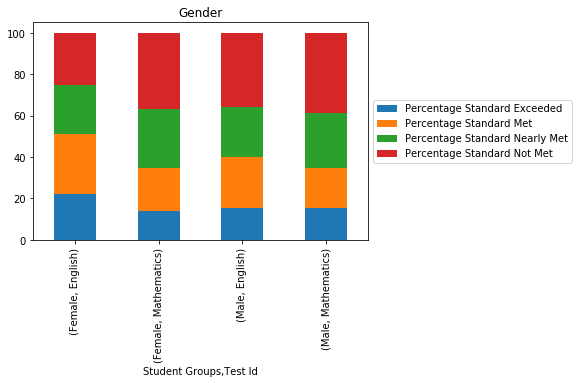

In [69]:
stackedbar(final_data, 'Gender')

**Ethnicity**

                                                 Percentage Standard Exceeded  \
Student Groups                      Test Id                                     
American Indian or Alaska Native    English                         10.793177   
                                    Mathematics                      7.697155   
Asian                               English                         34.605129   
                                    Mathematics                     34.360168   
Black or African American           English                         10.555620   
                                    Mathematics                      7.224482   
Filipino                            English                         31.369989   
                                    Mathematics                     29.017967   
Hispanic or Latino                  English                         12.580465   
                                    Mathematics                      9.230287   
Native Hawaiian or Pacific I

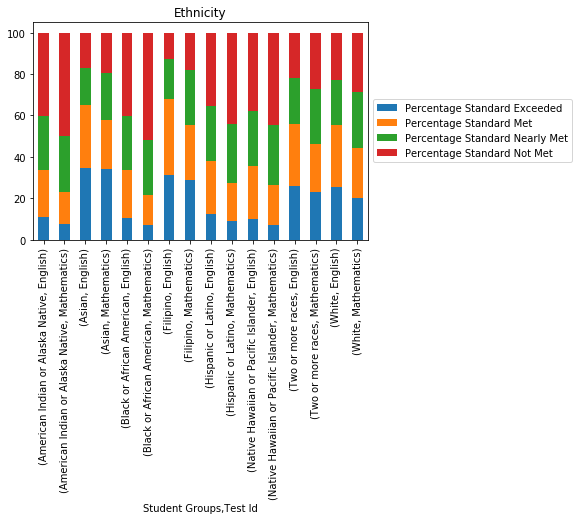

In [70]:
stackedbar(final_data, 'Ethnicity')

**English-Language Fluency**

                                                                Percentage Standard Exceeded  \
Student Groups                                     Test Id                                     
English learner                                    English                          2.312232   
                                                   Mathematics                      2.882001   
English learners (ELs) enrolled in school in th... English                          1.292127   
                                                   Mathematics                      6.190501   
English learners enrolled in school in the U.S.... English                          2.363645   
                                                   Mathematics                      2.779388   
English only                                       English                         20.923647   
                                                   Mathematics                     15.949822   
Ever-ELs                                

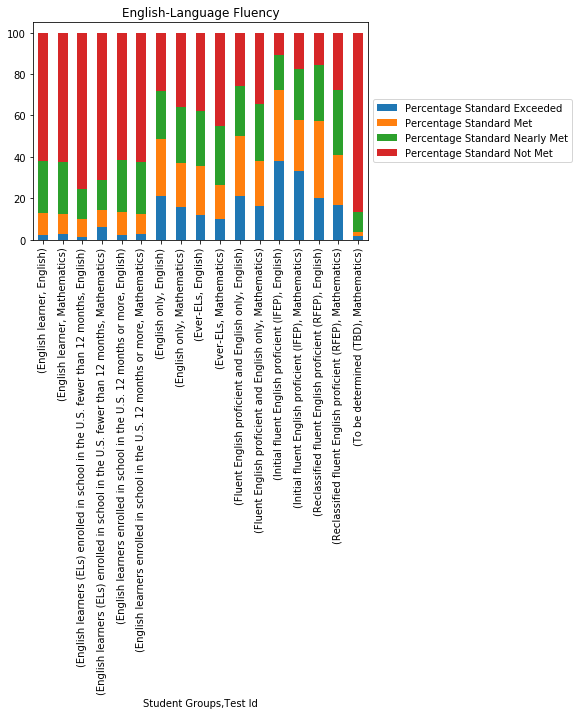

In [71]:
stackedbar(final_data, 'English-Language Fluency')

**Economic Status**

                                            Percentage Standard Exceeded  \
Student Groups                 Test Id                                     
Economically disadvantaged     English                         11.897263   
                               Mathematics                      8.706252   
Not economically disadvantaged English                         26.905752   
                               Mathematics                     21.300536   

                                            Percentage Standard Met  \
Student Groups                 Test Id                                
Economically disadvantaged     English                    24.675069   
                               Mathematics                17.334654   
Not economically disadvantaged English                    31.358650   
                               Mathematics                25.102372   

                                            Percentage Standard Nearly Met  \
Student Groups                 Test Id

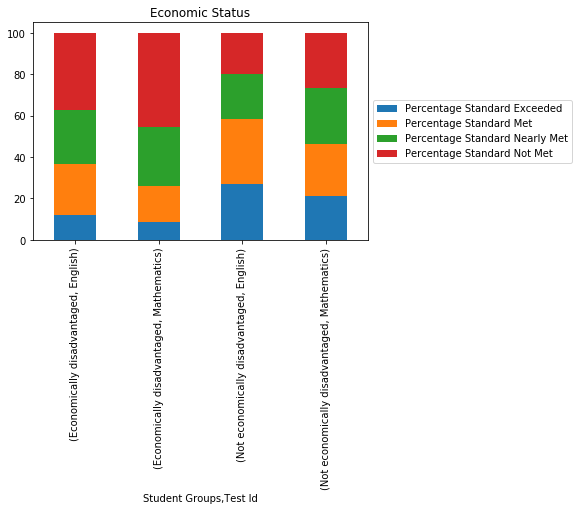

In [72]:
stackedbar(final_data, 'Economic Status')

**Disability Status**

                                                  Percentage Standard Exceeded  \
Student Groups                       Test Id                                     
Students with disability             English                          4.631896   
                                     Mathematics                      4.460772   
Students with no reported disability English                         20.031239   
                                     Mathematics                     15.556077   

                                                  Percentage Standard Met  \
Student Groups                       Test Id                                
Students with disability             English                     9.951914   
                                     Mathematics                 7.642909   
Students with no reported disability English                    28.556354   
                                     Mathematics                21.348168   

                                            

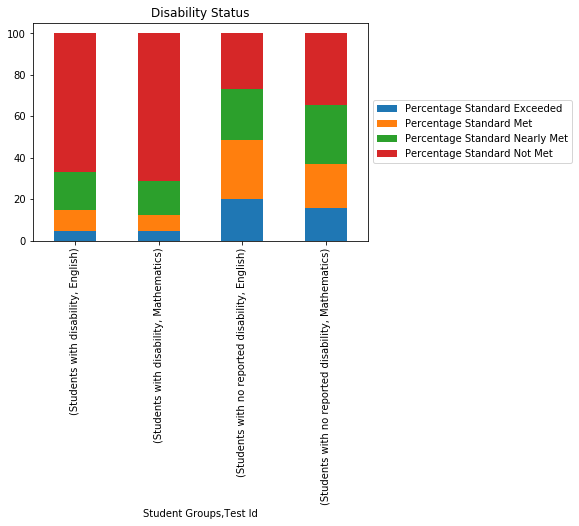

In [73]:
stackedbar(final_data, 'Disability Status')

In [74]:
#sns.set(style="whitegrid")
sns.set_style(style='ticks')
sns.set(rc={'figure.figsize':(30,16)})

In [75]:
def drawBarplot(df, category, testId, perfCol):
    df_local = df.loc[(df['Category'] == category) & (df['Test Id'] == testId)]
    ax = sns.barplot(x="School Name", y=perfCol, hue="Student Groups",  data=df_local, ci=None, n_boot=0)
    plt.xticks(rotation=90)
    plt.title(category +' | ' + testId + ' | ' + perfCol, size=24)

In [76]:
def drawBarplot2(df, category, testId1, testId2, levelName, perfCol):
    df_local1 = df.loc[(df['Category'] == category) & (df['Test Id'] == testId1)]
    df_local2 = df.loc[(df['Category'] == category) & (df['Test Id'] == testId2)]
    f, axes = plt.subplots(1, 2)
    
    sns.barplot(x=levelName, y=perfCol, hue="Student Groups",  data=df_local1, ax=axes[0], ci=None, n_boot=0)
    sns.barplot(x=levelName, y=perfCol, hue="Student Groups",  data=df_local2, ax=axes[1], ci=None, n_boot=0)
    
    f.suptitle(category, size=24)
    axes[0].set_title(testId1) 
    axes[1].set_title(testId2)
    
    for ax in f.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)

In [77]:
def drawBarplotFacetGrid2(df, category, perfCol1, perfCol2):
    df_local = df.loc[(df['Category'] == category)]
    
    g = sns.FacetGrid(df_local, col="Test Id", row_order=perfCol1)
    g.map(sns.barplot, "Student Groups", perfCol1)
    g.add_legend()
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(category, size=20)
    g.fig.subplots_adjust(top=.9)
    plt.show()
   
    g = sns.FacetGrid(df_local, col="Test Id", row_order=perfCol2)
    g.map(sns.barplot, "Student Groups", perfCol2)
    g.add_legend()
    g.set_xticklabels(rotation=90)
    plt.show()

In [78]:
def drawBarplotFacetGridEx(df, category, perfCols):
    df_local = df.loc[(df['Category'] == category)]

    df_local = df_local.loc[df_local['Performance Group'].isin(perfCols)]
    
    g = sns.FacetGrid(df_local, col="Test Id")
    g.map(sns.barplot, "Student Groups", "Performance Group Percentage", 'Performance Group', palette="rocket", ci=None )
    g.add_legend()
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(category, size=20, x = 0.5, y = 1.1)
    plt.show()

In [79]:
#stack data
# final_data_2 = final_data.loc[(final_data["Category"] == 'Gender'), ['Student Groups', 'Test Id', 'Percentage Standard Exceeded', 'Percentage Standard Not Met']]
# final_data_3 = final_data_2.set_index(['Student Groups', 'Test Id'])
# final_data_stacked = final_data_3.stack().to_frame()
# final_data_stacked.index.names = ['Student Groups', 'Test Id', 'Indicator']
# final_data_stacked.columns = ['Score_percent']

In [90]:
final_id_vars = ['Subgroup ID',
 'Student Groups',
 'Category',
 'County Code',
 'District Code',
 'School Code',
 'Test Year',
 'Type Id',
 'County Name',
 'District Name',
 'School Name',
 'Zip Code',
 'Test Id',
 'Students with Scores',
 'Area 1 Percentage Above Standard',
 'Area 1 Percentage Near Standard',
 'Area 1 Percentage Below Standard',
 'Area 2 Percentage Above Standard',
 'Area 2 Percentage Near Standard',
 'Area 2 Percentage Below Standard',
 'Area 3 Percentage Above Standard',
 'Area 3 Percentage Near Standard',
 'Area 3 Percentage Below Standard',
 'Area 4 Percentage Above Standard',
 'Area 4 Percentage Near Standard',
 'Area 4 Percentage Below Standard',
 'House_median']

final_value_vars = ['Percentage Standard Exceeded',
 'Percentage Standard Met',
 'Percentage Standard Nearly Met',
 'Percentage Standard Not Met']

final_data_ex = pd.melt(final_data, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
final_data_ex.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median,Performance Group,Performance Group Percentage
0,1.0,All Students,All Students,1.0,61883.638796,4.418893e+06,2018.0,7.0,Alameda,NaN,NaN,94579.153846,English,340.438127,27.953980,40.509967,31.536288,28.712508,38.057893,33.229900,20.529732,57.433579,22.036656,29.686120,42.981070,27.333144,892325.083612,Percentage Standard Exceeded,25.865686
1,1.0,All Students,All Students,1.0,61883.638796,4.418852e+06,2018.0,7.0,Alameda,NaN,NaN,94579.193980,Mathematics,341.809365,31.652475,25.114214,43.233478,26.125050,37.183512,36.691538,26.520435,40.576455,32.902943,0.000000,0.000000,0.000000,892615.050167,Percentage Standard Exceeded,24.052575
2,76.0,Asian,Ethnicity,1.0,62678.325991,4.896139e+06,2018.0,7.0,Alameda,NaN,NaN,94575.140969,English,123.123348,40.743656,40.535595,18.720793,44.765595,36.784361,18.450000,30.181278,56.580925,13.238150,44.664273,39.982555,15.353128,948414.096916,Percentage Standard Exceeded,40.524097
3,76.0,Asian,Ethnicity,1.0,62678.325991,4.896139e+06,2018.0,7.0,Alameda,NaN,NaN,94575.140969,Mathematics,124.048458,52.654229,26.777313,20.568018,43.338590,38.288326,18.373172,44.908458,39.363436,15.728238,0.000000,0.000000,0.000000,948414.096916,Percentage Standard Exceeded,42.480749
4,202.0,Asian,Ethnicity for Economically Disadvantaged,1.0,62022.409357,4.761854e+06,2018.0,7.0,Alameda,NaN,NaN,94571.725146,English,36.058480,27.416901,45.617310,26.965556,32.025322,42.531287,25.443743,20.205380,60.839415,18.955439,33.840351,44.085731,22.073860,912355.555556,Percentage Standard Exceeded,25.514678


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


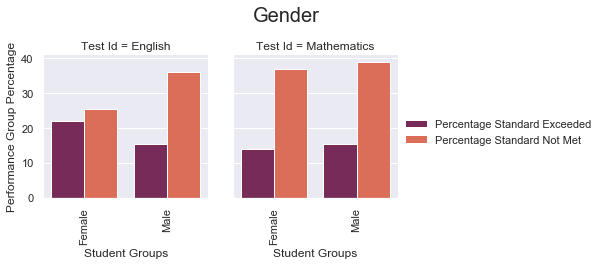

In [81]:
#FacetGrid : same legend
drawBarplotFacetGridEx(final_data_ex, 'Gender', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


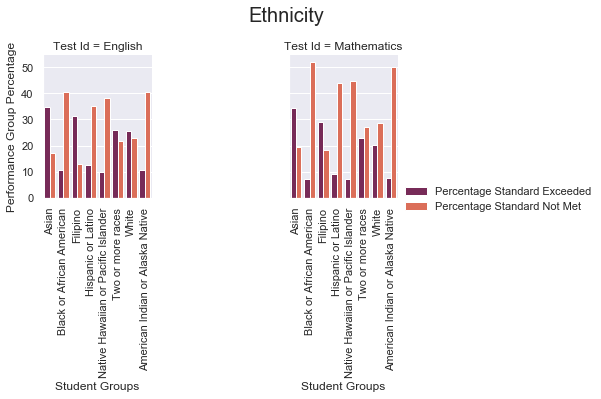

In [82]:
drawBarplotFacetGridEx(final_data_ex, 'Ethnicity', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

In [83]:
def drawScatterplot(df, category, perfCol):
    df_local = df.loc[(df['Category'] == category)]
    #g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups")
    g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups", size=10)
    g.map(plt.scatter, "School Name", perfCol, alpha=.7)
    g.add_legend();
    g.set_xticklabels(rotation=90) 

In [84]:
def drawBarplotFacetGrid(df, category, perfCol, mode):
    df_local = df.loc[(df['Category'] == category)]
    if mode=="Test Id":
        g = sns.FacetGrid(df_local, col="Test Id", row_order=perfCol)
        g.map(sns.barplot, "Student Groups", perfCol)
    elif mode=="Student Groups":
        g = sns.FacetGrid(df_local, col="Student Groups", row_order=perfCol)
        g.map(sns.barplot, "Test Id", perfCol)
    else:
        print("No perspertive is speficified. Please choose \"Test Id\" or \"Student Groups\".")
    g.add_legend();
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(category, size=20,)
    g.fig.subplots_adjust(top=.9)

In [85]:
#kdeplot

# final_data_2 = final_data.loc[(final_data["Category"] == 'Gender'), ['School Name', 'Student Groups', 'Test Id', 'Percentage Standard Exceeded', 'Percentage Standard Not Met']]

# fg = sns.FacetGrid(final_data_2, col='Test Id', hue='Student Groups', sharex=False, sharey=False, height=4)
# fg.map(sns.kdeplot, 'Percentage Standard Exceeded', shade=True, label='Data')\
#          .add_legend()\
#          .set_titles("{col_name}")\
#          .set_axis_labels()

# fg.map(sns.kdeplot, 'Percentage Standard Not Met', shade=True, label='Data')\
#          .add_legend()\
#          .set_titles("{col_name}")\
#          .set_axis_labels('')
# plt.show()

# plt.clf()
# plt.close('all')

In [86]:
#drawBarplotFacetGrid(final_data, 'Gender', 'Percentage Standard Not Met', 'Test Id')

In [87]:
#drawScatterplot(final_data, 'Gender', 'Percentage Standard Not Met')

In [88]:
#drawScatterplot(final_data, 'Ethnicity', 'Percentage Standard Not Met')

In [92]:
#drawBarplot2(final_data, 'Gender', 'English', 'Mathematics', 'School Name', 'Percentage Standard Exceeded')

In [93]:
#drawBarplot2(final_data_district, 'Gender', 'English', 'Mathematics', 'District Name', 'Percentage Standard Not Met')

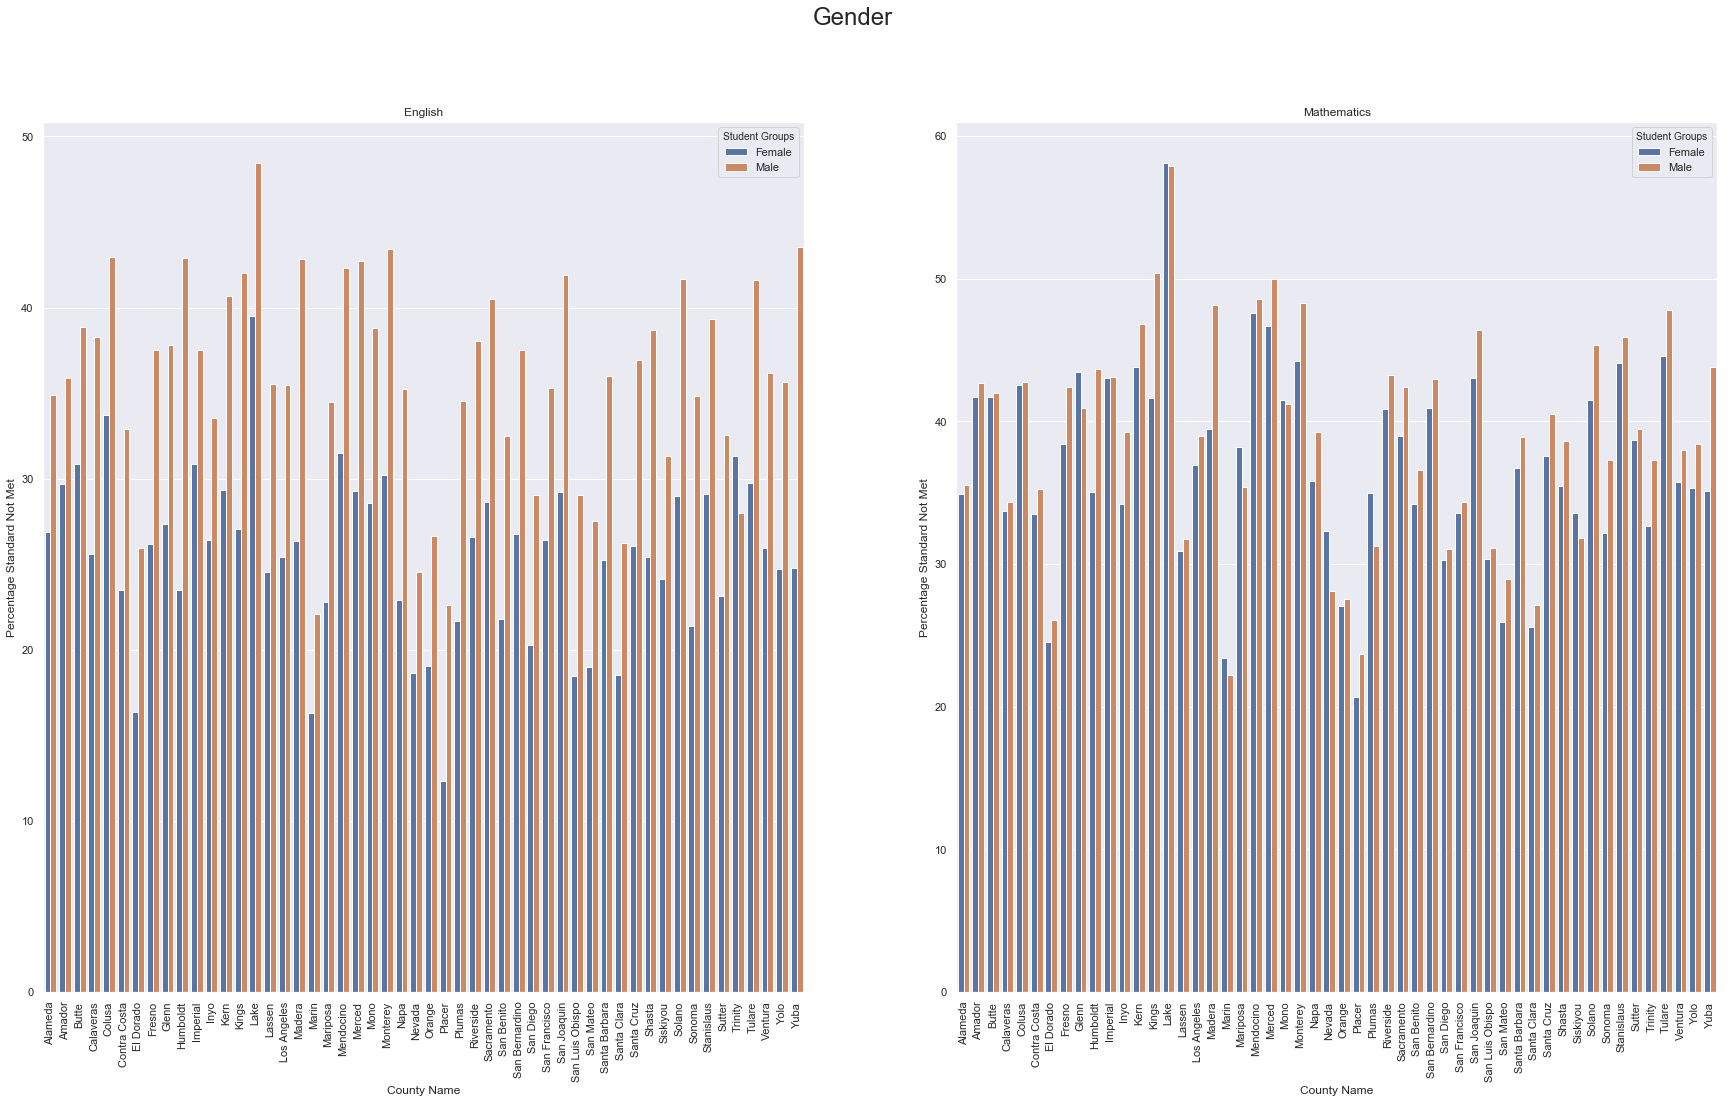

In [94]:
drawBarplot2(final_data, 'Gender', 'English', 'Mathematics', 'County Name', 'Percentage Standard Not Met')

## Correlations (Scatterplot)

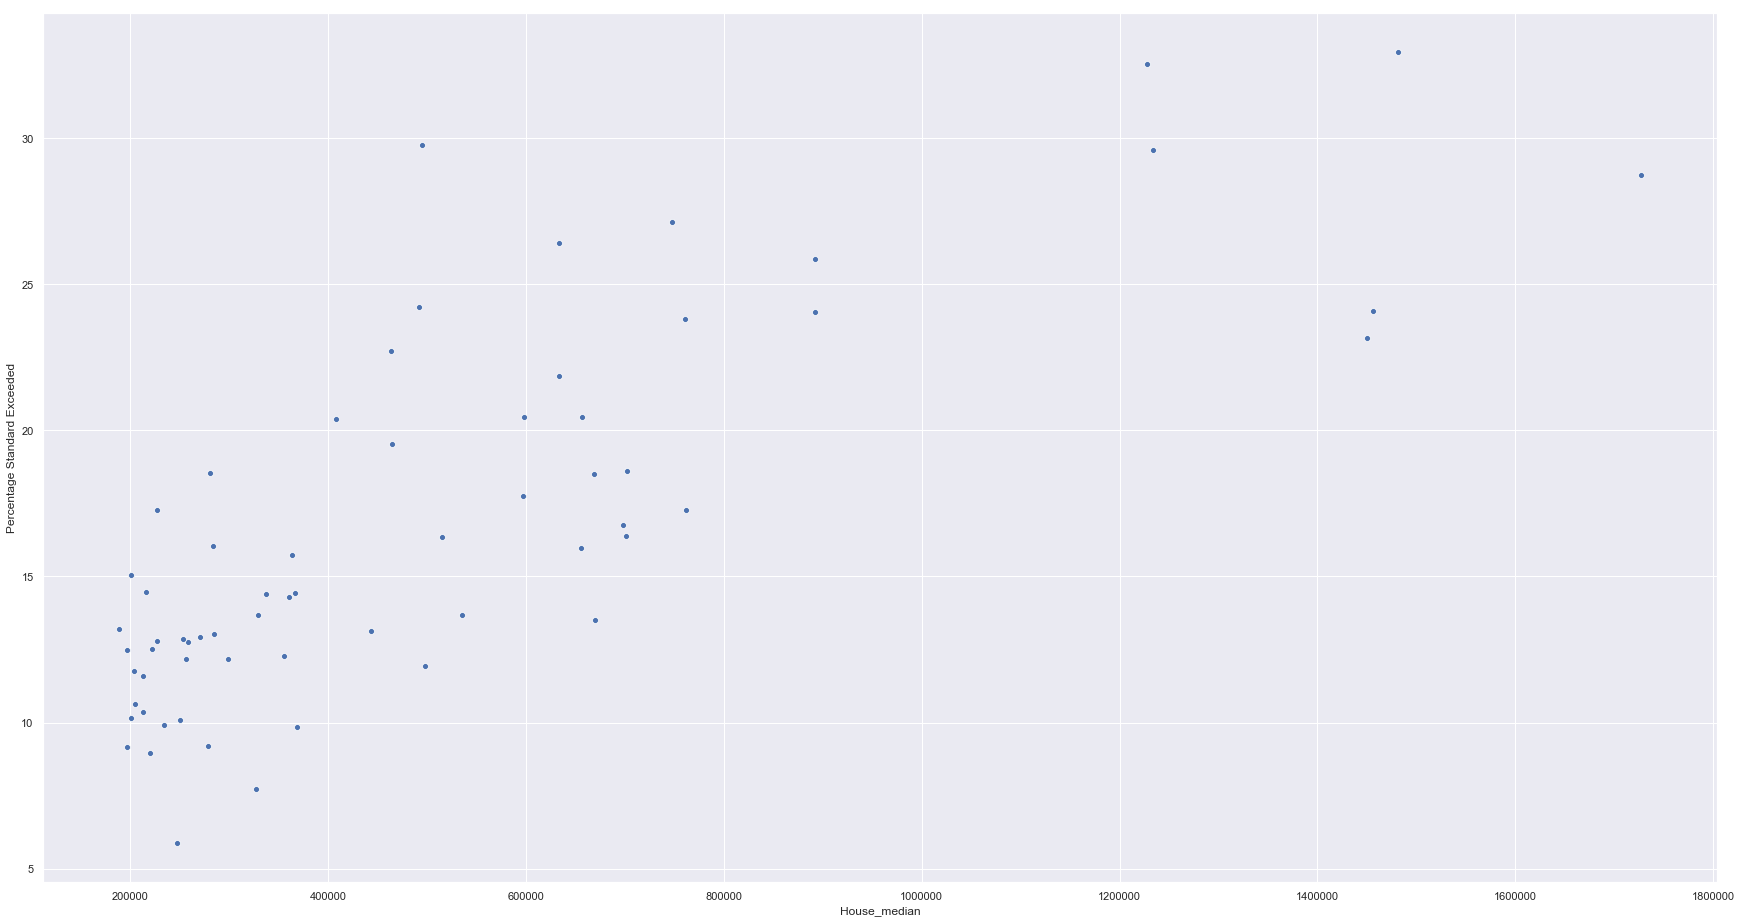

In [95]:
df_local = final_data.loc[(final_data['Student Groups'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="House_median", y='Percentage Standard Exceeded', data=df_local)

# Miscellaneous

In [96]:
#ive District Code with District Name from entities DataFrame

school_code_dict = {}

def make_code_dict(code, name):   
    if code not in school_code_dict.keys():
        school_code_dict[code] = name

code = entities.loc[(entities['District Name'] == 'Irvine Unified'), ['District Code']].iloc[0][0]
name = 'Irvine Unified'

#make the input parameter dataframe (Series of school names and get the codes)
make_code_dict(code, name)

print(school_code_dict)

{73650: 'Irvine Unified'}


**Hypothesis**

- The schools with many Asian students tend to achieve high scores.
- The schools with high-income families tend to achieve high scores.
- The schools with highly educated parents tend to achieve high scores.
- The schools surrounded by high house costs tend to achieve high scores.


**Example - dataframe from dict, MultiIndex**

In [97]:
example = pd.DataFrame(
    {'A': [1,1,1,2,2,2,3,3,3],
     'B': np.random.random(9),
     'C': np.random.random(9)}
)
example

,A,B,C
0,1,0.459480,0.370969
1,1,0.712958,0.075643
2,1,0.529250,0.183134
3,2,0.074941,0.804641
4,2,0.452251,0.203959
5,2,0.827192,0.247320
6,3,0.286556,0.057272
7,3,0.469589,0.391822
8,3,0.805314,0.190123


In [98]:
out = example.groupby('A').agg({'B': [np.mean, np.std], 'C': np.median})
out

B                   C
       mean       std    median
A                              
1  0.567229  0.130937  0.183134
2  0.451461  0.376126  0.247320
3  0.520486  0.263098  0.190123

In [99]:
out.columns

MultiIndex(levels=[['B', 'C'], ['mean', 'median', 'std']],
           labels=[[0, 0, 1], [0, 2, 1]])

In [100]:
out.columns.get_level_values(1)

Index(['mean', 'std', 'median'], dtype='object')

In [101]:
exampledict = {('USAF', ''): {0: '702730',
  1: '702730',
  2: '702730',
  3: '702730',
  4: '702730'},
 ('WBAN', ''): {0: '26451', 1: '26451', 2: '26451', 3: '26451', 4: '26451'},
 ('day', ''): {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
 ('month', ''): {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 ('s_CD', 'sum'): {0: 12.0, 1: 13.0, 2: 2.0, 3: 12.0, 4: 10.0},
 ('s_CL', 'sum'): {0: 0.0, 1: 0.0, 2: 10.0, 3: 0.0, 4: 0.0},
 ('s_CNT', 'sum'): {0: 13.0, 1: 13.0, 2: 13.0, 3: 13.0, 4: 13.0},
 ('s_PC', 'sum'): {0: 1.0, 1: 0.0, 2: 1.0, 3: 1.0, 4: 3.0},
 ('tempf', 'amax'): {0: 30.920000000000002,
  1: 32.0,
  2: 23.0,
  3: 10.039999999999999,
  4: 19.939999999999998},
 ('tempf', 'amin'): {0: 24.98,
  1: 24.98,
  2: 6.9799999999999969,
  3: 3.9199999999999982,
  4: 10.940000000000001},
 ('year', ''): {0: 1993, 1: 1993, 2: 1993, 3: 1993, 4: 1993}}

example2 = pd.DataFrame.from_dict(data = exampledict)
example2

USAF   WBAN day month  s_CD  s_CL s_CNT s_PC  tempf         year
                             sum   sum   sum  sum   amax   amin      
0  702730  26451   1     1  12.0   0.0  13.0  1.0  30.92  24.98  1993
1  702730  26451   2     1  13.0   0.0  13.0  0.0  32.00  24.98  1993
2  702730  26451   3     1   2.0  10.0  13.0  1.0  23.00   6.98  1993
3  702730  26451   4     1  12.0   0.0  13.0  1.0  10.04   3.92  1993
4  702730  26451   5     1  10.0   0.0  13.0  3.0  19.94  10.94  1993

In [102]:
example2.columns

MultiIndex(levels=[['USAF', 'WBAN', 'day', 'month', 's_CD', 's_CL', 's_CNT', 's_PC', 'tempf', 'year'], ['', 'amax', 'amin', 'sum']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9], [0, 0, 0, 0, 3, 3, 3, 3, 1, 2, 0]])